<font color = "lightblue">

# Лабораторна робота №2 <font/>

<font color = 'lightblue'>

### Мета: <font/>

<font color = 'lightgrey'>
У цій лабораторній роботі нашим завданням було навчитись реалізовувати алгоритми стиску даних, такі як: Huffman, LZ77, LZW та Deflate. Тому тут реалізовані саме ці алгоритми. Також були використані принципи ООП під час написання алгоритмів, присутні графіки для порівняння.
<font/>

Розподіл роботи між учасниками команди:
<font color = 'lightgrey'>

**Кохан Ірина** - Huffman, Deflate

**Іванченко Марія** - LZW, LZ77
<font/>


<font color = 'lightblue'>

### Huffman algorithm
<font/>

<font color = 'lightgrey'>
Цей алгоритм працює за кодом Гаффмана, який у результаті повертає код у вигляді бінарної стрічки. У класі реалізовано метод для читання, кодування та декодування. Кодування використовує код Гаффмана таким чином, створює кортежі з значенням та його ймовірністю і покроково зливає два елементи з найменшою ймовірністю. Зупиняється коли залишається один кортеж. 
Якщо описувати детальніше, то після зчитування файлу, потрібно запустити процес підрахунку ймовірності, що вертає словник. Далі алгоритм працює з цим словником, зливаючи два кортежі з найменшою ймовірністю в одне ціле і сортує заново. Також можна виконати декодинг, але використовуючи вище згааданий словник.

Краще працює за умови багатьох повторів елементів, адже тоді коефіцієнт стиснення краще.
<font/>

<font color = 'lightblue'>

Результат в encoded.txt або decoded.txt (за замовчуванням)
<font/>

In [39]:
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import os

In [40]:
class Huffman:
    """
    A class to represent the Huffman coding algorithm.
    Attributes:
        path (str): A string representing the path of the file to be compressed or decompressed.
    """

    def __init__(self, path: str) -> None:
        self.path = path
        self.probability = defaultdict(int)


    def reading(self) -> dict:
        """
        Reading our txt file, representing it as dictionary of letters and their occurance.
        """
        with open(self.path, "r", encoding="utf-8") as file:
            lines = file.readlines()
            for line in lines:
                for elem in line.strip():
                    self.probability[elem] += line.count(elem)
        return self.probability

    def algorithm(self) -> dict:
        """
        Main algorithm of finding binary code.
        Creates new dict with same keys, but values are interpreted
        as '0' and '1'. The result of code is reversed.
        """
        value_dic = defaultdict(str) #dict to which we will add 0 and 1
        items = sorted(self.probability.items()) # ('letter', counting)
        while len(items) > 1:
            summing_value = items[0][1] + items[1][1]
            items.append((items[0][0] + items[1][0], summing_value))
            for letter in items[0][0]:
                value_dic[letter] += '0'
            for letter in items[1][0]:
                value_dic[letter] += '1'
            del items[0]
            del items[0]
            items.sort(key = lambda x: x[1])
        for key, elem in value_dic.items():
            value_dic[key] = elem[::-1]
        return value_dic

    def encoding(self, dictionary, file_write = 'encoded.txt'):
        """
        Encoding of the text.
        """
        encoded_file = open(file_write, 'w', encoding='utf-8')
        with open(self.path, "r", encoding="utf-8") as file:
            lines = file.readlines()
            for line in lines:
                for letter in line:
                    encoded_file.write(dictionary[letter])
                encoded_file.write('\n')
        encoded_file.close()

    def decoding(self, dictionary, file_read = 'encoded.txt', file_write = 'decoded.txt'):
        """
        Decoding given code.
        """
        reversed_dic = dict([(value, key) for key, value in dictionary.items()])
        code_keys = reversed_dic.keys()
        file_write = open(file_write, 'w', encoding='utf-8')
        with open(file_read, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            for ind, line in enumerate(lines):
                decoded_str = ''
                find_elem = ''
                for elem in line:
                    find_elem += elem
                    if find_elem in code_keys:
                        decoded_str += reversed_dic[find_elem]
                        find_elem = ''
                file_write.write(decoded_str)
                if ind != len(lines) - 1:
                    file_write.write('\n')
        file_write.close()


In [41]:
#using
trying = Huffman("lorem.txt") #file from where to read code
res = trying.reading()
dic = trying.algorithm()
trying.encoding(dic)
trying.decoding(dic)

<font color = 'lightblue'>

### Calculating of compression

It compressed approximately 43,2%
<font/>

In [42]:
def calculate_len():
    """
    Calculates len of encoded and decoded message
    """
    lorem_len = 0
    encoded_len = 0
    with open('lorem.txt', 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            lorem_len += len(line)
    with open('encoded.txt', 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            encoded_len += len(line)
    len_coded_message = encoded_len // 8
    return len_coded_message, lorem_len

coded, initial = calculate_len()
print(f'Emount of symbols in the text: {initial}')
print(f'Emount of symbols in the encoded text: {coded}')
print(f'Percentage of compression is: {100 - coded/initial*100}%')

Emount of symbols in the text: 3292
Emount of symbols in the encoded text: 1870
Percentage of compression is: 43.195625759416764%


<font color = 'lightblue'>

### LZ77 algorithm
<font/>

<font color = 'lightgrey'>
У цьому класі реалізовано ЛЗ77, у якому є методи кодування, розкодування. Кодування починається зі створення індексу, який показує де ми зараз знахожимось у тексті та циклу. Цикл закінчується тоді коли ми досягаємо кінця тексту. Всередині ми шукаємо як далеко ми маємо зайти у буфері, щоб знайти нашу поточну букву, також перевіряємо чи останній це елемент чи ні.

Кофіцієнт стиснення менший ніж в інших (за умови взяття дефолтного буферу), проте з його збільшенням і збільшується коефіцієнт. Повільніший за Гаффмана.
<font/>

<font color = 'lightblue'>

Результат в compressed_77.txt (за замовчуванням)
<font/>

In [43]:
"""LZ77"""

class LZ77:
    """
    Implementation of LZ77 algorythm.
    Encode and decode methods.
    """
    def __init__(self, text, buff_size) -> int:
        self.text = text
        self.buf = buff_size

    def encode(self) -> list:
        """
        Does encoding using LZ77 algorithm.
        >>> lz77 = LZ77('abdabbadabcadba', 5)
        >>> lz77.encode()
        [(0, 0, 'a'), (0, 0, 'b'), (0, 0, 'd'), (3, 2, 'b'), \
(3, 1, 'd'), (5, 2, 'c'), (5, 2, 'b'), (3, 1, None)]
        >>> lz77 = LZ77('abacabacabadaca',5)
        >>> lz77.encode()
        [(0, 0, 'a'), (0, 0, 'b'), (2, 1, 'c'), (4, 7, 'd'), (4, 1, 'c'), (4, 1, None)]
        """
        # check
        if ".txt" in self.text:
            with open(self.text, "r", encoding="utf-8") as data:
                self.text = data.read()

        # init
        code = []
        index = 0

        # cycle
        while index < len(self.text):
            buffer_start = max(index - self.buf, 0)
            offset = 0
            lenght = 0

            # find step
            # step - value that shows how much steps back in buffer we need
            for i in range(buffer_start, index):
                step = 0
                while index+step < len(self.text) and self.text[index+step] == self.text[i+step]:
                    step += 1

                if step > offset:
                    lenght = step
                    offset = index - i

            # check if last or not
            if index + lenght < len(self.text):
                code.append((offset, lenght, self.text[index+lenght]))
            else:
                code.append((offset, lenght, None))
            index += lenght + 1

        return code

    def decode(self, code):
        """
        Does decoding using LZ77 algorithm.
        """
        # check if file
        if isinstance(code, list) is False:
            with open(code, "r", encoding="utf-8") as data:
                code = data.read().split("||")
        else:
            code = [str(elem[0]) + str(elem[1]) + str(elem[2]) for elem in code]

        # decode
        result = ""
        for val in code:
            if val != "" and val != 'one':
                step_back = len(result) - int(val[0])
                result += (
                    result[step_back : step_back + int(val[1])] + str(val[2])
                    if int(val[0]) != 0
                    else str(val[2])
                )
        if result[-1] != 'N':
            return result
        return result[:-1]


# You can try to compare by writing code to file
# But if you want to check, here is the code

def write_file(code):
    """
    Writes encoded text to file.
    """
    with open("compressed_77.txt", "w", encoding="utf-8") as file:
        if isinstance(code, list) is True:
            for elem in code:
                file.write(str(elem[0])+str(elem[1])+str(elem[2])+'||')
        else:
            file.write(code)

def read_file(file):
    """
    Simply reads file.
    """
    with open(file, "r", encoding="utf-8") as data:
        return data.read()

# You are welcome to use your file instead of lorem

In [44]:
#using with file
example = LZ77('lorem.txt', 5)
write_file(example.encode())
write_file(example.decode('compressed_77.txt'))

<font color = 'lightblue'>

### LZW algorythm
<font/>

<font color= 'lightgrey'>
У цьому класі присутні методі кодування, розкадування та знаходження найкращої позиції, який є допоміжним у кодуванні. Кодування працює таким чином, ми беремо стрічку і шукаємо фрагмент, якого немає у словнику. Якщо знаходиться такий, повертаємо індекс елемента, інакше None. Якщо ми отримала індекс, тоді ми шукаємо індекс кінця та додаємо новий елемент у словник, в код та перевизначаємо індекс. Інакше додаємо до словника решту тексту і закінчуємо цикл. Декод отримує словник з множиною усіх значень тексту і код. Далі є два варіанти, якщо у словнику є такий код, записуємо, інакше додаємо до словника значення, яке складається з комбінації нашого останнього елементу та його першої букви.

Хороше стиснення, але працює гірше за відсутності повторів. По часу виконання не дуже відстає від LZ77 та Гаффмана.
<font/>

<font color = 'lightblue'>

Результат в lzw.txt (за замовчуванням)
<font/>

In [45]:
"""LZW"""

class LZW:
    """
    LZW algorythm implementation.
    Contains such methods: encode, decode, find_right_ind.
    """
    def __init__(self, text) -> None:
        self.text = text
        self.dct = None
        self.code = None

    # encode
    def encode(self) -> tuple[list, dict]:
        """
        Compresing or encoding text using LZW algorythm.
        >>> try1 = LZW("abacabacabadaca")
        >>> try1.encode()
        [0, 1, 0, 2, 4, 6, 8, 3, 9]
        >>> try2 = LZW("abdabbadabcadba")
        >>> try2.encode()
        [0, 1, 3, 4, 1, 0, 6, 1, 2, 9, 8]
        >>> try3 = LZW("abacababacabc")
        >>> try3.encode()
        [0, 1, 0, 2, 3, 7, 6, 1, 2]
        >>> try4 = LZW("abacabadabacabae")
        >>> try4.encode()
        [0, 1, 0, 2, 5, 0, 3, 9, 8, 6, 4]
        >>> try5 = LZW("abcbabcdeadaba")
        >>> try5.encode()
        [0, 1, 2, 1, 5, 2, 3, 4, 0, 3, 5, 0]
        """
        # check
        if ".txt" in self.text:
            with open(self.text, "r", encoding="utf-8") as data:
                self.text = data.read()
        # dict
        self.dct = {val: i for i, val in enumerate(sorted(set(self.text)))}

        # result code and text copy
        self.code = []

        # loop
        ind = 0
        while ind != "end":
            ind2 = self.find_right_ind(self.text[ind:])
            if ind2 is not None:
                end = ind + ind2
                self.dct[self.text[ind:end]] = len(self.dct)
                self.code.append(self.dct[self.text[ind : end - 1]])
                ind = end - 1
                self.dct = self.dct
                self.code = self.code
            else:
                self.code.append(self.dct[self.text[ind:]])
                ind = "end"

        return self.code

    def find_right_ind(self, piece: str) -> int:
        """
        Find the right current element and returns index for slicing.
        """
        for i in range(len(piece)):
            if piece[: i + 1] not in self.dct.keys():
                return i + 1

    # decode
    def decode(self, dct: dict, code: list) -> str:
        """
        Decoding text using LZW algorythm.
        >>> lempel = LZW('abacabacabadaca')
        >>> me = lempel.encode()
        >>> dct_1 = {i: val for i, val in enumerate(sorted(set(lempel.text)))}
        >>> lempel.decode(dct_1, me) == 'abacabacabadaca'
        True
        """
        # check
        if dct is None:
            return "No dictinary provided, decoding is not possible."
        elif code is None:
            return "No code provided, decoding is not possible."

        # init
        text = ''
        text += dct[code[0]]
        self.code = code[1:]
        previous = 0

        # cycle
        for current in self.code:
            # if there is no such code in dict we make by taking
            # full previous code and its first character
            if current not in dct:
                dct[len(dct)] = dct[previous] + dct[previous][0]
            # this goes if everything is okay
            else:
                dct[len(dct)] = dct[previous] + dct[current][0]

            text += dct[current]
            previous = current

        return text
    
    def read_file(self, file):
        """
        Simply reads file.
        """
        with open(file, "r", encoding="utf-8") as data:
            return data.read()
    
# If you want to try using file

def write_file(code):
    """
    Writes encoded text to file.
    """
    with open("lzw.txt", "w", encoding="utf-8") as file:
        if isinstance(code, list) is True:
            for elem in code:
                file.write(str(elem))
        else:
            file.write(code)

def read_file(file):
    """
    Simply reads file.
    """
    with open(file, "r", encoding="utf-8") as data:
        return data.read()

In [46]:
lempel = LZW("lorem.txt")
dct_1 = {i: val for i, val in enumerate(sorted(set(read_file("lorem.txt"))))}
code = lempel.encode()
write_file(lempel.decode(dct_1, code))


##### Compression degree is 42% 

In [47]:
# code to calculate compression degree
lempel = LZW("lorem.txt")
before = len(read_file("lorem.txt"))
after = len(lempel.encode())
f'Percentage of compression is: {after/before*100}%'

'Percentage of compression is: 42.46658566221142%'

<font color = 'lightblue'>

### Deflate algorythm
<font/>

<font color = 'lightgrey'>
Цей алгоритм є поєднанням ЛЗ77 та коду Гаффмана. Спочатку кодуємо повідомлення за ЛЗ77, а потім за Гаффмана. Розкодування відбувається навпаки, спочатку Гаффмана, потім ЛЗ77. Додаткові файли, які використовуються в роботі видаляються.

Алгоритм, що працює найдовше з причини виконання двох алгоритмів підряд, тим не менше його стиснення теж вагоме.
<font/>

<font color = 'lightblue'>

Результат в compressed_deflate.txt (за замовчуванням)
<font/>

In [48]:
"""DEFLATE"""

class Deflate:
    """
    Combining lz77 and Huffman codes.
    """
    def __init__(self, path:str) -> None:
        self.path = path
        self.dictionary = None

    def encoding(self, file_write: str = 'encoded.txt') -> None:
        """
        We are coding by lz77 first. Then using Huffman coding.
        """
        lz77 = LZ77(self.path, 5)
        write_file_d(lz77.encode())
        huff = Huffman('compressed_deflate.txt')
        huff.reading()
        self.dictionary = huff.algorithm()
        huff.encoding(self.dictionary, file_write)

    def decoding(self, file_read: str = 'encoded.txt', file_write: str = 'decoded.txt'):
        """
        Decoding process.
        The result will be at compressed.txt
        """
        huffman = Huffman(file_read)
        huffman.decoding(self.dictionary)
        lz77 = LZ77(file_write, 5)
        write_file_d(lz77.decode(file_write))
        os.remove("decoded.txt")

def write_file_d(code, path = 'compressed_deflate.txt'):
    """
    Writes encoded text to file.
    """
    with open(path, "w", encoding="utf-8") as file:
        if isinstance(code, list) is True:
            for elem in code:
                file.write(str(elem[0])+str(elem[1])+str(elem[2])+'||')
        else:
            file.write(code)


In [49]:
#using
elem = Deflate('lorem.txt')
elem.encoding()
elem.decoding()

In [50]:
def calculate_len():
    """
    Calculates len of encoded and decoded message
    """
    lorem_len = 0
    encoded_len = 0
    with open('granat.txt', 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            lorem_len += len(line)
    with open('encoded.txt', 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            encoded_len += len(line)
    len_coded_message = encoded_len // 8
    return len_coded_message, lorem_len

coded, initial = calculate_len()
print(f'Emount of symbols in the text: {initial}')
print(f'Emount of symbols in the encoded text: {coded}')
print(f'Percentage of compression is: {100 - coded/initial*100}%')

Emount of symbols in the text: 91121
Emount of symbols in the encoded text: 5127
Percentage of compression is: 94.37341556831026%


<font color = 'lightblue'>

## Conclusion
<font/>

<font color='lightgrey'>
У висновку ми порівняємо усі алгоритми. Алгоритм Гаффмана доволі швидкий, але його стиснення не найкраще. Також його ефективність буде краще, якщо у тексті часто повторюються якісь символи. ЛЗ77 не такий швидший як ЛЗВ і його коефіцієнт стиснення значно менший, однак усе залежить від величини буферу. ЛЗВ швидкий, легкий до реалізації і добре стискає дані, однак він гірше працює на текстах, які мають мало повторень. Щодо алгоритму Deflate, то він краще стискує, але при тому через використання двох алгоритмів зразу, працює значно повільніше.

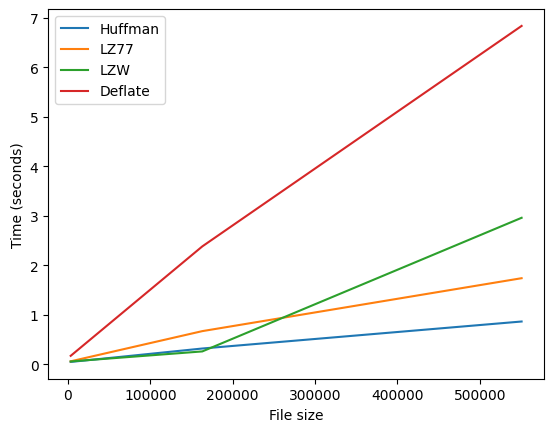

In [51]:

# pathes = ['read1.txt', 'read2.txt', 'read3.txt', 'read4.txt', 'read5.txt', 'read6.txt',
#           'read7.txt', 'read8.txt', 'read9.txt']
pathes = ['lorem.txt', 'granat.txt', 'chorna_rada.txt']
times_h = []
times_7 = []
times_w = []
times_d = []
# times_d = []
values = [os.path.getsize(elem) for elem in pathes]

for elem in pathes:
    start_time = time.time()
    trying = Huffman(elem) #file from where to read code
    res = trying.reading()
    dic = trying.algorithm()
    trying.encoding(dic)
    trying.decoding(dic)
    times_h.append(time.time() - start_time)
    start_time = time.time()
    example = LZ77(elem, 5)
    write_file(example.decode(example.encode()))
    times_7.append(time.time() - start_time)
    start_time = time.time()
    example1 = LZW(elem)
    dct = {i: val for i, val in enumerate(sorted(set(read_file(elem))))}
    write_file(example1.decode(dct, example1.encode()))
    times_w.append(time.time() - start_time)
    start_time = time.time()
    elem = Deflate(elem)
    elem.encoding()
    elem.decoding()
    times_d.append(time.time() - start_time)


plt.plot(values, times_h, label="Huffman") 
plt.plot(values, times_7, label="LZ77") 
plt.plot(values, times_w, label="LZW")
plt.plot(values, times_d, label="Deflate")
plt.legend() 
plt.xlabel("File size") 
plt.ylabel("Time (seconds)") 
plt.show()